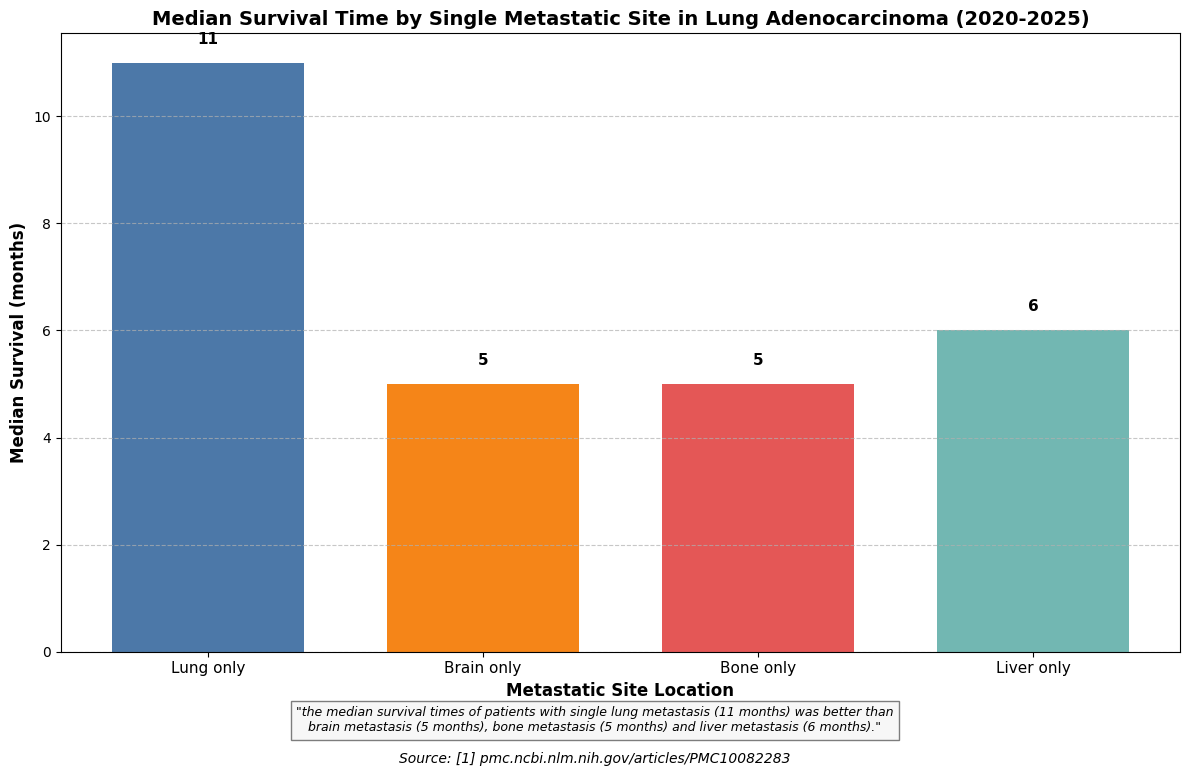

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Survival data by metastatic site from 2020-2025 studies
survival_data = {
    'Site': ['Lung only', 'Brain only', 'Bone only', 'Liver only'],
    'Median Survival (months)': [11, 5, 5, 6],
    'Study Period': ['2020-2025', '2020-2025', '2020-2025', '2020-2025']
}

# Create DataFrame
df = pd.DataFrame(survival_data)

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create bar chart
x = np.arange(len(df['Site']))
width = 0.7

# Plot bars
bars = ax.bar(x, df['Median Survival (months)'], width, color=['#4C78A8', '#F58518', '#E45756', '#72B7B2'])

# Customize chart
ax.set_xlabel('Metastatic Site Location', fontsize=12, fontweight='bold')
ax.set_ylabel('Median Survival (months)', fontsize=12, fontweight='bold')
ax.set_title('Median Survival Time by Single Metastatic Site in Lung Adenocarcinoma (2020-2025)',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df['Site'], fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{height}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add citation
plt.figtext(0.5, 0.01,
            'Source: [1] pmc.ncbi.nlm.nih.gov/articles/PMC10082283',
            ha='center', fontsize=10, style='italic')

# Add annotation with exact quotation
plt.figtext(0.5, 0.05,
            '"the median survival times of patients with single lung metastasis (11 months) was better than\n'
            'brain metastasis (5 months), bone metastasis (5 months) and liver metastasis (6 months)."',
            ha='center', fontsize=9, style='italic', bbox=dict(facecolor='#f0f0f0', alpha=0.5))

plt.tight_layout(rect=[0, 0.07, 1, 0.97])
plt.show()

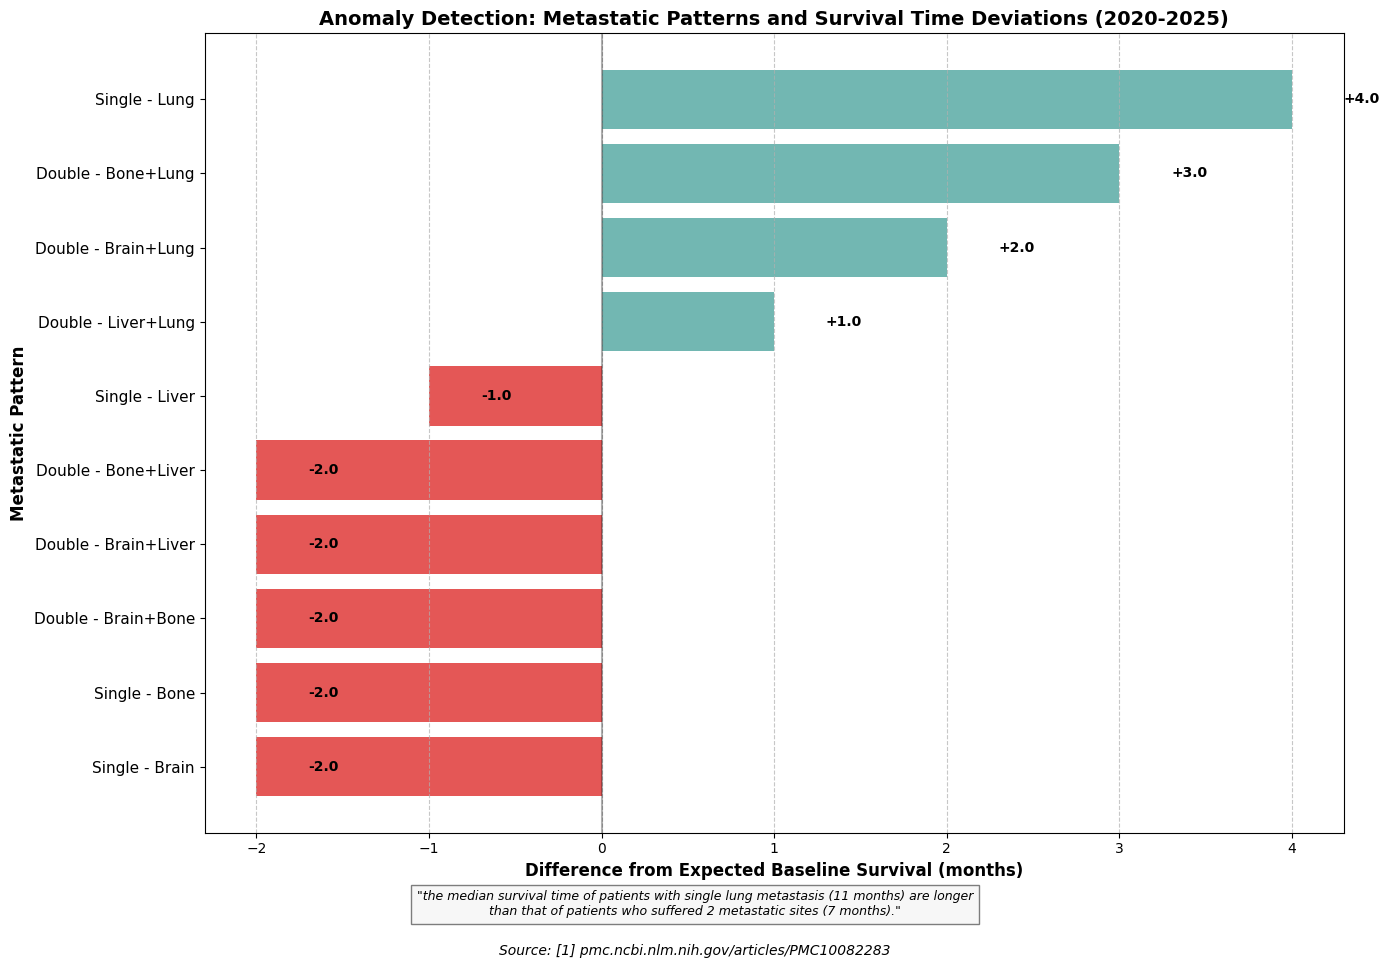

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Metastatic burden data with expected vs actual survival
metastatic_burden = {
    'Metastatic Pattern': [
        'Single - Lung',
        'Single - Brain',
        'Single - Bone',
        'Single - Liver',
        'Double - Bone+Lung',
        'Double - Brain+Lung',
        'Double - Liver+Lung',
        'Double - Brain+Bone',
        'Double - Brain+Liver',
        'Double - Bone+Liver'
    ],
    'Median Survival (months)': [11, 5, 5, 6, 10, 9, 8, 5, 5, 5],
    'Expected Baseline (months)': [7, 7, 7, 7, 7, 7, 7, 7, 7, 7]  # Average 2-site survival as baseline
}

# Create DataFrame
df = pd.DataFrame(metastatic_burden)

# Calculate difference from baseline (anomaly)
df['Difference'] = df['Median Survival (months)'] - df['Expected Baseline (months)']

# Sort by difference to highlight anomalies
df = df.sort_values('Difference')

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 10))

# Create horizontal bar chart
y = np.arange(len(df['Metastatic Pattern']))
width = 0.8

# Define colors based on whether it's above or below baseline
colors = ['#E45756' if x < 0 else '#72B7B2' for x in df['Difference']]

# Plot bars
bars = ax.barh(y, df['Difference'], width, color=colors)

# Customize chart
ax.set_xlabel('Difference from Expected Baseline Survival (months)', fontsize=12, fontweight='bold')
ax.set_ylabel('Metastatic Pattern', fontsize=12, fontweight='bold')
ax.set_title('Anomaly Detection: Metastatic Patterns and Survival Time Deviations (2020-2025)',
             fontsize=14, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df['Metastatic Pattern'], fontsize=11)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels on bars
for bar in bars:
    width = bar.get_width()
    label_x = width + 0.3 if width < 0 else width + 0.3
    ax.text(label_x, bar.get_y() + bar.get_height()/2,
            f'{width:+.1f}', va='center', ha='center' if width == 0 else 'left',
            fontsize=10, fontweight='bold')

# Add annotations
plt.figtext(0.5, 0.01,
            'Source: [1] pmc.ncbi.nlm.nih.gov/articles/PMC10082283',
            ha='center', fontsize=10, style='italic')

plt.figtext(0.5, 0.05,
            '"the median survival time of patients with single lung metastasis (11 months) are longer\n'
            'than that of patients who suffered 2 metastatic sites (7 months)."',
            ha='center', fontsize=9, style='italic', bbox=dict(facecolor='#f0f0f0', alpha=0.5))

plt.tight_layout(rect=[0, 0.07, 1, 0.97])
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

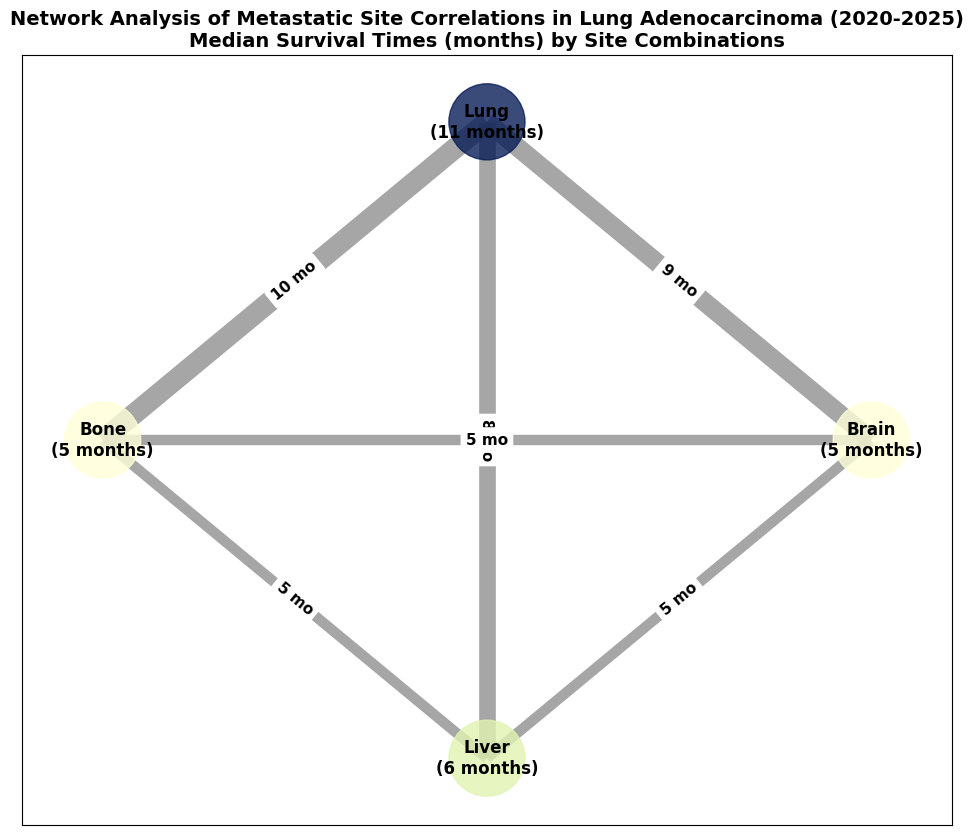

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create graph
G = nx.Graph()

# Add nodes for metastatic sites and outcomes
metastatic_sites = ['Lung', 'Brain', 'Bone', 'Liver']
for site in metastatic_sites:
    G.add_node(site, type='site')

# Add edge weights based on survival outcomes when these sites are involved
# These represent the median survival time in months
edges = [
    ('Lung', 'Brain', 9),  # Brain + Lung: 8-9 months
    ('Lung', 'Bone', 10),  # Bone + Lung: 10 months
    ('Lung', 'Liver', 8),  # Liver + Lung: 8 months
    ('Brain', 'Bone', 5),  # Brain + Bone: 5 months
    ('Brain', 'Liver', 5),  # Brain + Liver: 5 months
    ('Bone', 'Liver', 5),  # Bone + Liver: 5 months
]

# Add edges to the graph
for source, target, weight in edges:
    G.add_edge(source, target, weight=weight, survival=weight)

# Set up the figure
plt.figure(figsize=(12, 10))

# Define node positions
pos = {
    'Lung': [0, 0.8],
    'Brain': [0.8, 0],
    'Bone': [-0.8, 0],
    'Liver': [0, -0.8]
}

# Define node colors based on single-site survival
node_colors = {
    'Lung': 11,  # 11 months
    'Brain': 5,  # 5 months
    'Bone': 5,   # 5 months
    'Liver': 6   # 6 months
}

# Draw nodes
node_sizes = [3000 for _ in metastatic_sites]
nx.draw_networkx_nodes(G, pos, nodelist=metastatic_sites,
                       node_color=[node_colors[node] for node in metastatic_sites],
                       node_size=node_sizes, alpha=0.8, cmap=plt.cm.YlGnBu)

# Draw edges with thickness proportional to combined survival
edges_to_draw = G.edges()
edge_widths = [G[source][target]['survival']*1.5 for source, target in edges_to_draw]
nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, width=edge_widths, alpha=0.7,
                       edge_color='gray')

# Add node labels with single-site survival
node_labels = {site: f"{site}\n({node_colors[site]} months)" for site in metastatic_sites}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')

# Add edge labels showing the dual-site survival time
edge_labels = {(source, target): f"{G[source][target]['survival']} mo"
              for source, target in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=11, font_weight='bold')

# Add title
plt.title('Network Analysis of Metastatic Site Correlations in Lung Adenocarcinoma (2020-2025)\nMedian Survival Times (months) by Site Combinations',
          fontsize=14, fontweight='bold')

# Add legend for node colors (single-site survival)
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlGnBu, norm=plt.Normalize(vmin=5, vmax=11))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.1, aspect=40, shrink=0.8)
cbar.set_label('Single Site Median Survival (months)', fontsize=10, fontweight='bold')

# Add citation
plt.figtext(0.5, 0.01,
            'Sources: [1] pmc.ncbi.nlm.nih.gov/articles/PMC10082283\n'
            '[2] frontiersin.org/journals/oncology/articles/10.3389/fonc.2023.1075385',
            ha='center', fontsize=10, style='italic')

# Add quotation
plt.figtext(0.5, 0.06,
            '"the median survival time of patients with single lung metastasis (11 months) was better than\n'
            'brain metastasis (5 months), bone metastasis (5 months) and liver metastasis (6 months)"\n'
            '"patients with lung metastasis had better survival results"',
            ha='center', fontsize=9, style='italic', bbox=dict(facecolor='#f0f0f0', alpha=0.5))

plt.axis('off')
plt.tight_layout(rect=[0, 0.06, 1, 0.94])
plt.show()